In [1]:
import tensorflow as tf

In [3]:
# tape_gradient()는 자동 미분 기능을 수행한다. 임의로 식을 만들어서 w에 대해 미분해보겠다.
# =>텐서플로우를 통해 선형회귀 실습!
w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [6]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [8]:
# 가설을 함수로서 정의한다.
@tf.function
def hypothesis(x):
    return W*x + b

In [9]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [10]:
# 다음과 같이 평균 제곱 오차를 손실 함수로서 정의한다.
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [11]:
# 여기서 사용할 데이터는 X와 y가 약 10배의 차이를 가지는 데이터다.
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
# 옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용한다.
optimizer = tf.optimizers.SGD(0.01)

In [13]:
# 약 300본애 걸쳐 경사 하강법을 수행한다.
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [14]:
# 위에선 W와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어든다.
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [15]:
# 케라스로 구하는 선형 회귀
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [16]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 899us/step - loss: 420.7095 - mse: 420.7095
Epoch 2/300
9/9 [==============================] - 0s 883us/step - loss: 2.3829 - mse: 2.3829
Epoch 3/300
9/9 [==============================] - 0s 808us/step - loss: 2.3739 - mse: 2.3739
Epoch 4/300
9/9 [==============================] - 0s 901us/step - loss: 2.3652 - mse: 2.3652
Epoch 5/300
9/9 [==============================] - 0s 937us/step - loss: 2.3569 - mse: 2.3569
Epoch 6/300
9/9 [==============================] - ETA: 0s - loss: 3.7590 - mse: 3.759 - 0s 933us/step - loss: 2.3489 - mse: 2.3489
Epoch 7/300
9/9 [==============================] - 0s 819us/step - loss: 2.3412 - mse: 2.3412
Epoch 8/300
9/9 [==============================] - 0s 942us/step - loss: 2.3339 - mse: 2.3339
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3269 - mse: 2.3269
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3201 - mse: 2.3201
Epoch 11/300
9/9 [===

9/9 [==============================] - 0s 1ms/step - loss: 2.1576 - mse: 2.1576
Epoch 88/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1572 - mse: 2.1572
Epoch 89/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1568 - mse: 2.1568
Epoch 90/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1565 - mse: 2.1565
Epoch 91/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1561 - mse: 2.1561
Epoch 92/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1558 - mse: 2.1558
Epoch 93/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1555 - mse: 2.1555
Epoch 94/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1552 - mse: 2.1552
Epoch 95/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1549 - mse: 2.1549
Epoch 96/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1546 - mse: 2.1546
Epoch 97/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1543 - ms

9/9 [==============================] - 0s 2ms/step - loss: 2.1466 - mse: 2.1466
Epoch 175/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1466 - mse: 2.1466
Epoch 176/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1466 - mse: 2.1466
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1466 - mse: 2.1466
Epoch 178/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1466 - mse: 2.1466
Epoch 179/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1465 - mse: 2.1465
Epoch 180/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1465 - mse: 2.1465
Epoch 181/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1465 - mse: 2.1465
Epoch 182/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1465 - mse: 2.1465
Epoch 183/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1465 - mse: 2.1465
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss: 2

9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 262/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1461 - mse: 2.1461
Epoch 263/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 264/300
9/9 [==============================] - ETA: 0s - loss: 2.5234 - mse: 2.523 - 0s 2ms/step - loss: 2.1461 - mse: 2.1461
Epoch 265/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 266/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1461 - mse: 2.1461
Epoch 267/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1461 - mse: 2.1461
Epoch 268/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1461 - mse: 2.1461
Epoch 269/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 270/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1460 - mse: 2.1460
Epoch 271/300
9/9 [=================

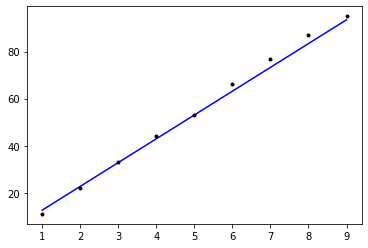

In [17]:
# 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려본다.
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [18]:
print(model.predict([9.5])) # 약 9시간 30분을 공부하면 약 98.5점을 얻는다고 예측한다.

[[98.55646]]


In [ ]:
# 이진분류에서 사용되는 시그모이드 함수를 만들어 본다.

In [19]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

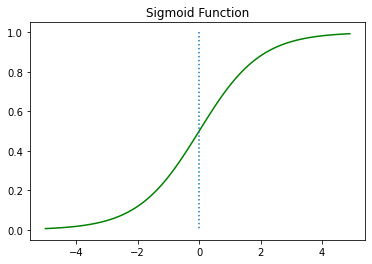

In [20]:
# W는 1, b는 0임을 가정한 그래프다.
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

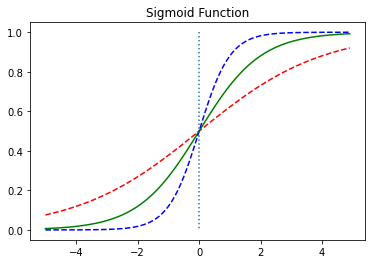

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

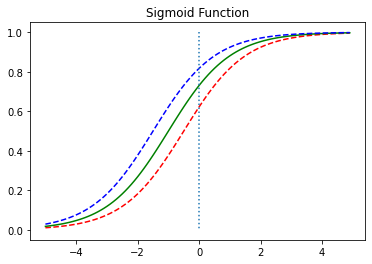

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [23]:
# 케라스로 구현하는 로지스틱 회귀
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [24]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 515us/step - loss: 13.6949 - binary_accuracy: 0.3846
Epoch 2/200
13/13 [==============================] - 0s 566us/step - loss: 0.2164 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 733us/step - loss: 0.2032 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 960us/step - loss: 0.1994 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 961us/step - loss: 0.1971 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 856us/step - loss: 0.1952 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 742us/step - loss: 0.1935 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 725us/step - loss: 0.1919 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 848us/step - loss: 0.1904 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [=======

13/13 [==============================] - 0s 960us/step - loss: 0.1281 - binary_accuracy: 0.9231
Epoch 77/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1275 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 973us/step - loss: 0.1269 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1264 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 765us/step - loss: 0.1259 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 617us/step - loss: 0.1253 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 708us/step - loss: 0.1248 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 695us/step - loss: 0.1243 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 749us/step - loss: 0.1238 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [================

13/13 [==============================] - 0s 862us/step - loss: 0.0992 - binary_accuracy: 0.9231
Epoch 151/200
13/13 [==============================] - 0s 992us/step - loss: 0.0990 - binary_accuracy: 0.9231
Epoch 152/200
13/13 [==============================] - 0s 715us/step - loss: 0.0987 - binary_accuracy: 0.9231
Epoch 153/200
13/13 [==============================] - 0s 692us/step - loss: 0.0984 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 698us/step - loss: 0.0982 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 860us/step - loss: 0.0979 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 837us/step - loss: 0.0976 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 803us/step - loss: 0.0974 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 786us/step - loss: 0.0971 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [===

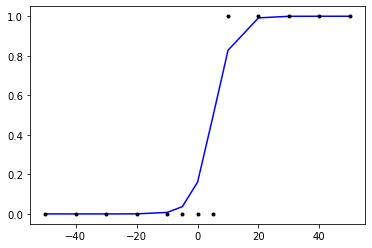

In [25]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [26]:
# X값이 5보다 작을때는 0.5보다 작은 값을, X값이 10보다 클때는 0.5보다 큰 값을 출력한다.
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.20956561]
 [0.26787987]
 [0.3355326 ]
 [0.4106868 ]
 [0.45015183]]
[[0.8691939 ]
 [0.9940313 ]
 [0.99976045]
 [0.99999046]
 [1.        ]]


In [27]:
# 다중 입력에 대한 실습=> 다중 선형 회귀/ 다중 로지스틱 회귀
# 다중선형 회귀부터 진행한다.

import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

# 학습률(learning rate, lr)은 0.00001로 합니다.
sgd=optimizers.SGD(lr=0.00001)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)

Epoch 1/2000
5/5 [==============================] - 0s 712us/step - loss: 11076.7090 - mse: 11076.7090
Epoch 2/2000
5/5 [==============================] - 0s 525us/step - loss: 1509.5807 - mse: 1509.5807
Epoch 3/2000
5/5 [==============================] - 0s 623us/step - loss: 240.6373 - mse: 240.6373
Epoch 4/2000
5/5 [==============================] - 0s 711us/step - loss: 88.2465 - mse: 88.2465
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 74.2822 - mse: 74.2822
Epoch 6/2000
5/5 [==============================] - 0s 765us/step - loss: 73.2932 - mse: 73.2932
Epoch 7/2000
5/5 [==============================] - 0s 1ms/step - loss: 72.0458 - mse: 72.0458
Epoch 8/2000
5/5 [==============================] - 0s 625us/step - loss: 70.2375 - mse: 70.2375
Epoch 9/2000
5/5 [==============================] - 0s 2ms/step - loss: 68.3515 - mse: 68.3515
Epoch 10/2000
5/5 [==============================] - 0s 516us/step - loss: 66.6133 - mse: 66.6133
Epoch 11/2000
5/5 [====

5/5 [==============================] - 0s 1ms/step - loss: 44.2946 - mse: 44.2946
Epoch 86/2000
5/5 [==============================] - 0s 998us/step - loss: 44.1324 - mse: 44.1324
Epoch 87/2000
5/5 [==============================] - 0s 901us/step - loss: 43.9707 - mse: 43.9707
Epoch 88/2000
5/5 [==============================] - 0s 1ms/step - loss: 43.8096 - mse: 43.8096
Epoch 89/2000
5/5 [==============================] - 0s 1ms/step - loss: 43.6492 - mse: 43.6492
Epoch 90/2000
5/5 [==============================] - 0s 797us/step - loss: 43.4893 - mse: 43.4893
Epoch 91/2000
5/5 [==============================] - 0s 943us/step - loss: 43.3300 - mse: 43.3300
Epoch 92/2000
5/5 [==============================] - 0s 1ms/step - loss: 43.1713 - mse: 43.1713
Epoch 93/2000
5/5 [==============================] - 0s 883us/step - loss: 43.0133 - mse: 43.0133
Epoch 94/2000
5/5 [==============================] - 0s 1ms/step - loss: 42.8557 - mse: 42.8557
Epoch 95/2000
5/5 [=========================

Epoch 169/2000
5/5 [==============================] - 0s 2ms/step - loss: 32.5485 - mse: 32.5485
Epoch 170/2000
5/5 [==============================] - 0s 908us/step - loss: 32.4294 - mse: 32.4294
Epoch 171/2000
5/5 [==============================] - 0s 945us/step - loss: 32.3106 - mse: 32.3106
Epoch 172/2000
5/5 [==============================] - 0s 759us/step - loss: 32.1923 - mse: 32.1923
Epoch 173/2000
5/5 [==============================] - 0s 999us/step - loss: 32.0745 - mse: 32.0745
Epoch 174/2000
5/5 [==============================] - 0s 830us/step - loss: 31.9571 - mse: 31.9571
Epoch 175/2000
5/5 [==============================] - 0s 722us/step - loss: 31.8401 - mse: 31.8401
Epoch 176/2000
5/5 [==============================] - 0s 1ms/step - loss: 31.7235 - mse: 31.7235
Epoch 177/2000
5/5 [==============================] - 0s 800us/step - loss: 31.6074 - mse: 31.6074
Epoch 178/2000
5/5 [==============================] - 0s 946us/step - loss: 31.4917 - mse: 31.4917
Epoch 179/2000

Epoch 252/2000
5/5 [==============================] - 0s 976us/step - loss: 24.0061 - mse: 24.0061
Epoch 253/2000
5/5 [==============================] - 0s 878us/step - loss: 23.9182 - mse: 23.9182
Epoch 254/2000
5/5 [==============================] - 0s 898us/step - loss: 23.8306 - mse: 23.8306
Epoch 255/2000
5/5 [==============================] - 0s 792us/step - loss: 23.7434 - mse: 23.7434
Epoch 256/2000
5/5 [==============================] - 0s 2ms/step - loss: 23.6565 - mse: 23.6565
Epoch 257/2000
5/5 [==============================] - 0s 760us/step - loss: 23.5699 - mse: 23.5699
Epoch 258/2000
5/5 [==============================] - 0s 1ms/step - loss: 23.4836 - mse: 23.4836
Epoch 259/2000
5/5 [==============================] - 0s 815us/step - loss: 23.3976 - mse: 23.3976
Epoch 260/2000
5/5 [==============================] - 0s 882us/step - loss: 23.3120 - mse: 23.3120
Epoch 261/2000
5/5 [==============================] - 0s 1ms/step - loss: 23.2266 - mse: 23.2266
Epoch 262/2000
5

5/5 [==============================] - 0s 1ms/step - loss: 17.7061 - mse: 17.7061
Epoch 336/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.6413 - mse: 17.6413
Epoch 337/2000
5/5 [==============================] - 0s 2ms/step - loss: 17.5767 - mse: 17.5767
Epoch 338/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.5124 - mse: 17.5124
Epoch 339/2000
5/5 [==============================] - 0s 868us/step - loss: 17.4483 - mse: 17.4483
Epoch 340/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.3844 - mse: 17.3844
Epoch 341/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.3208 - mse: 17.3208
Epoch 342/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.2574 - mse: 17.2574
Epoch 343/2000
5/5 [==============================] - 0s 918us/step - loss: 17.1942 - mse: 17.1942
Epoch 344/2000
5/5 [==============================] - 0s 820us/step - loss: 17.1313 - mse: 17.1313
Epoch 345/2000
5/5 [===================

5/5 [==============================] - 0s 2ms/step - loss: 13.0600 - mse: 13.0600
Epoch 419/2000
5/5 [==============================] - 0s 691us/step - loss: 13.0121 - mse: 13.0121
Epoch 420/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.9645 - mse: 12.9645
Epoch 421/2000
5/5 [==============================] - 0s 859us/step - loss: 12.9171 - mse: 12.9171
Epoch 422/2000
5/5 [==============================] - 0s 788us/step - loss: 12.8698 - mse: 12.8698
Epoch 423/2000
5/5 [==============================] - 0s 2ms/step - loss: 12.8227 - mse: 12.8227
Epoch 424/2000
5/5 [==============================] - 0s 784us/step - loss: 12.7758 - mse: 12.7758
Epoch 425/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.7290 - mse: 12.7290
Epoch 426/2000
5/5 [==============================] - 0s 2ms/step - loss: 12.6824 - mse: 12.6824
Epoch 427/2000
5/5 [==============================] - 0s 971us/step - loss: 12.6360 - mse: 12.6360
Epoch 428/2000
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 9.6336 - mse: 9.6336
Epoch 502/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.5983 - mse: 9.5983
Epoch 503/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.5632 - mse: 9.5632
Epoch 504/2000
5/5 [==============================] - 0s 980us/step - loss: 9.5282 - mse: 9.5282
Epoch 505/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.4933 - mse: 9.4933
Epoch 506/2000
5/5 [==============================] - 0s 913us/step - loss: 9.4586 - mse: 9.4586
Epoch 507/2000
5/5 [==============================] - 0s 881us/step - loss: 9.4240 - mse: 9.4240
Epoch 508/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.3895 - mse: 9.3895
Epoch 509/2000
5/5 [==============================] - 0s 861us/step - loss: 9.3552 - mse: 9.3552
Epoch 510/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.3209 - mse: 9.3209
Epoch 511/2000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 1ms/step - loss: 7.0549 - mse: 7.0549
Epoch 587/2000
5/5 [==============================] - 0s 1ms/step - loss: 7.0291 - mse: 7.0291
Epoch 588/2000
5/5 [==============================] - 0s 1ms/step - loss: 7.0034 - mse: 7.0034
Epoch 589/2000
5/5 [==============================] - 0s 934us/step - loss: 6.9777 - mse: 6.9777
Epoch 590/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.9522 - mse: 6.9522
Epoch 591/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.9268 - mse: 6.9268
Epoch 592/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.9014 - mse: 6.9014
Epoch 593/2000
5/5 [==============================] - 0s 2ms/step - loss: 6.8762 - mse: 6.8762
Epoch 594/2000
5/5 [==============================] - 0s 896us/step - loss: 6.8511 - mse: 6.8511
Epoch 595/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.8260 - mse: 6.8260
Epoch 596/2000
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 1ms/step - loss: 5.1672 - mse: 5.1672
Epoch 672/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.1483 - mse: 5.1483
Epoch 673/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.1294 - mse: 5.1294
Epoch 674/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.1107 - mse: 5.1107
Epoch 675/2000
5/5 [==============================] - 0s 2ms/step - loss: 5.0920 - mse: 5.0920
Epoch 676/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.0734 - mse: 5.0734
Epoch 677/2000
5/5 [==============================] - 0s 881us/step - loss: 5.0549 - mse: 5.0549
Epoch 678/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.0364 - mse: 5.0364
Epoch 679/2000
5/5 [==============================] - 0s 1ms/step - loss: 5.0180 - mse: 5.0180
Epoch 680/2000
5/5 [==============================] - 0s 796us/step - loss: 4.9996 - mse: 4.9996
Epoch 681/2000
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 696us/step - loss: 3.7853 - mse: 3.7853
Epoch 757/2000
5/5 [==============================] - 0s 858us/step - loss: 3.7715 - mse: 3.7715
Epoch 758/2000
5/5 [==============================] - 0s 600us/step - loss: 3.7577 - mse: 3.7577
Epoch 759/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.7440 - mse: 3.7440
Epoch 760/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.7303 - mse: 3.7303
Epoch 761/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.7167 - mse: 3.7167
Epoch 762/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.7031 - mse: 3.7031
Epoch 763/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.6896 - mse: 3.6896
Epoch 764/2000
5/5 [==============================] - 0s 1000us/step - loss: 3.6761 - mse: 3.6761
Epoch 765/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.6627 - mse: 3.6627
Epoch 766/2000
5/5 [==============================] - 0s

5/5 [==============================] - 0s 1ms/step - loss: 2.7738 - mse: 2.7738
Epoch 842/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.7637 - mse: 2.7637
Epoch 843/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.7536 - mse: 2.7536
Epoch 844/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.7435 - mse: 2.7435
Epoch 845/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.7335 - mse: 2.7335
Epoch 846/2000
5/5 [==============================] - 0s 755us/step - loss: 2.7235 - mse: 2.7235
Epoch 847/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.7136 - mse: 2.7136
Epoch 848/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.7037 - mse: 2.7037
Epoch 849/2000
5/5 [==============================] - 0s 685us/step - loss: 2.6938 - mse: 2.6938
Epoch 850/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.6840 - mse: 2.6840
Epoch 851/2000
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 1ms/step - loss: 2.0260 - mse: 2.0260
Epoch 928/2000
5/5 [==============================] - 0s 903us/step - loss: 2.0186 - mse: 2.0186
Epoch 929/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.0113 - mse: 2.0113
Epoch 930/2000
5/5 [==============================] - 0s 989us/step - loss: 2.0039 - mse: 2.0039
Epoch 931/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.9966 - mse: 1.9966
Epoch 932/2000
5/5 [==============================] - 0s 999us/step - loss: 1.9893 - mse: 1.9893
Epoch 933/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.9821 - mse: 1.9821
Epoch 934/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.9749 - mse: 1.9749
Epoch 935/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.9677 - mse: 1.9677
Epoch 936/2000
5/5 [==============================] - 0s 810us/step - loss: 1.9605 - mse: 1.9605
Epoch 937/2000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 1ms/step - loss: 1.4860 - mse: 1.4860
Epoch 1013/2000
5/5 [==============================] - 0s 877us/step - loss: 1.4806 - mse: 1.4806
Epoch 1014/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4753 - mse: 1.4753
Epoch 1015/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4699 - mse: 1.4699
Epoch 1016/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4645 - mse: 1.4645
Epoch 1017/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4592 - mse: 1.4592
Epoch 1018/2000
5/5 [==============================] - 0s 0s/step - loss: 1.4539 - mse: 1.4539
Epoch 1019/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4486 - mse: 1.4486
Epoch 1020/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4434 - mse: 1.4434
Epoch 1021/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.4381 - mse: 1.4381
Epoch 1022/2000
5/5 [==============================] - 

5/5 [==============================] - 0s 1ms/step - loss: 1.0909 - mse: 1.0909
Epoch 1098/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0869 - mse: 1.0869
Epoch 1099/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.0830 - mse: 1.0830
Epoch 1100/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0790 - mse: 1.0790
Epoch 1101/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0751 - mse: 1.0751
Epoch 1102/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0712 - mse: 1.0712
Epoch 1103/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0673 - mse: 1.0673
Epoch 1104/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0635 - mse: 1.0635
Epoch 1105/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.0596 - mse: 1.0596
Epoch 1106/2000
5/5 [==============================] - 0s 2ms/step - loss: 1.0558 - mse: 1.0558
Epoch 1107/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.8017 - mse: 0.8017
Epoch 1183/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7988 - mse: 0.7988
Epoch 1184/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7959 - mse: 0.7959
Epoch 1185/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7930 - mse: 0.7930
Epoch 1186/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7901 - mse: 0.7901
Epoch 1187/2000
5/5 [==============================] - 0s 798us/step - loss: 0.7873 - mse: 0.7873
Epoch 1188/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7844 - mse: 0.7844
Epoch 1189/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7816 - mse: 0.7816
Epoch 1190/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7788 - mse: 0.7788
Epoch 1191/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7760 - mse: 0.7760
Epoch 1192/2000
5/5 [==============================] -

5/5 [==============================] - 0s 1ms/step - loss: 0.5900 - mse: 0.5900
Epoch 1268/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5879 - mse: 0.5879
Epoch 1269/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5858 - mse: 0.5858
Epoch 1270/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5837 - mse: 0.5837
Epoch 1271/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5816 - mse: 0.5816
Epoch 1272/2000
5/5 [==============================] - 0s 872us/step - loss: 0.5795 - mse: 0.5795
Epoch 1273/2000
5/5 [==============================] - ETA: 0s - loss: 1.1563 - mse: 1.156 - 0s 1ms/step - loss: 0.5774 - mse: 0.5774
Epoch 1274/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5754 - mse: 0.5754
Epoch 1275/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.5733 - mse: 0.5733
Epoch 1276/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5712 - mse: 0.5712
Epoch 1277/2000


5/5 [==============================] - 0s 1ms/step - loss: 0.4367 - mse: 0.4367
Epoch 1352/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4351 - mse: 0.4351
Epoch 1353/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4336 - mse: 0.4336
Epoch 1354/2000
5/5 [==============================] - 0s 801us/step - loss: 0.4321 - mse: 0.4321
Epoch 1355/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4305 - mse: 0.4305
Epoch 1356/2000
5/5 [==============================] - 0s 789us/step - loss: 0.4290 - mse: 0.4290
Epoch 1357/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4275 - mse: 0.4275
Epoch 1358/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4259 - mse: 0.4259
Epoch 1359/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4244 - mse: 0.4244
Epoch 1360/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4229 - mse: 0.4229
Epoch 1361/2000
5/5 [==============================]

5/5 [==============================] - 0s 1ms/step - loss: 0.3241 - mse: 0.3241
Epoch 1436/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3230 - mse: 0.3230
Epoch 1437/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3218 - mse: 0.3218
Epoch 1438/2000
5/5 [==============================] - 0s 996us/step - loss: 0.3207 - mse: 0.3207
Epoch 1439/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3196 - mse: 0.3196
Epoch 1440/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3184 - mse: 0.3184
Epoch 1441/2000
5/5 [==============================] - 0s 977us/step - loss: 0.3173 - mse: 0.3173
Epoch 1442/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3162 - mse: 0.3162
Epoch 1443/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3151 - mse: 0.3151
Epoch 1444/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3140 - mse: 0.3140
Epoch 1445/2000
5/5 [==============================]

5/5 [==============================] - 0s 1ms/step - loss: 0.2406 - mse: 0.2406
Epoch 1521/2000
5/5 [==============================] - 0s 948us/step - loss: 0.2398 - mse: 0.2398
Epoch 1522/2000
5/5 [==============================] - 0s 959us/step - loss: 0.2389 - mse: 0.2389
Epoch 1523/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2381 - mse: 0.2381
Epoch 1524/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.2373 - mse: 0.2373
Epoch 1525/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2365 - mse: 0.2365
Epoch 1526/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2356 - mse: 0.2356
Epoch 1527/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2348 - mse: 0.2348
Epoch 1528/2000
5/5 [==============================] - 0s 800us/step - loss: 0.2340 - mse: 0.2340
Epoch 1529/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2332 - mse: 0.2332
Epoch 1530/2000
5/5 [=============================

Epoch 1605/2000
5/5 [==============================] - 0s 827us/step - loss: 0.1795 - mse: 0.1795
Epoch 1606/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1789 - mse: 0.1789
Epoch 1607/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1783 - mse: 0.1783
Epoch 1608/2000
5/5 [==============================] - 0s 720us/step - loss: 0.1777 - mse: 0.1777
Epoch 1609/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1771 - mse: 0.1771
Epoch 1610/2000
5/5 [==============================] - 0s 737us/step - loss: 0.1765 - mse: 0.1765
Epoch 1611/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1759 - mse: 0.1759
Epoch 1612/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1753 - mse: 0.1753
Epoch 1613/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1747 - mse: 0.1747
Epoch 1614/2000
5/5 [==============================] - 0s 957us/step - loss: 0.1741 - mse: 0.1741
Epoch 1615/2000
5/5 [===========

5/5 [==============================] - 0s 855us/step - loss: 0.1353 - mse: 0.1353
Epoch 1690/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1349 - mse: 0.1349
Epoch 1691/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 1692/2000
5/5 [==============================] - 0s 977us/step - loss: 0.1340 - mse: 0.1340
Epoch 1693/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1335 - mse: 0.1335
Epoch 1694/2000
5/5 [==============================] - 0s 892us/step - loss: 0.1331 - mse: 0.1331
Epoch 1695/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1326 - mse: 0.1326
Epoch 1696/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1322 - mse: 0.1322
Epoch 1697/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1318 - mse: 0.1318
Epoch 1698/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1313 - mse: 0.1313
Epoch 1699/2000
5/5 [=============================

Epoch 1774/2000
5/5 [==============================] - 0s 942us/step - loss: 0.1025 - mse: 0.1025
Epoch 1775/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1022 - mse: 0.1022
Epoch 1776/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1019 - mse: 0.1019
Epoch 1777/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1015 - mse: 0.1015
Epoch 1778/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1012 - mse: 0.1012
Epoch 1779/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1009 - mse: 0.1009
Epoch 1780/2000
5/5 [==============================] - 0s 982us/step - loss: 0.1006 - mse: 0.1006
Epoch 1781/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1002 - mse: 0.1002
Epoch 1782/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0999 - mse: 0.0999
Epoch 1783/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0996 - mse: 0.0996
Epoch 1784/2000
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 0.0788 - mse: 0.0788
Epoch 1859/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0785 - mse: 0.0785
Epoch 1860/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0783 - mse: 0.0783
Epoch 1861/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0781 - mse: 0.0781
Epoch 1862/2000
5/5 [==============================] - 0s 991us/step - loss: 0.0778 - mse: 0.0778
Epoch 1863/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0776 - mse: 0.0776
Epoch 1864/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0773 - mse: 0.0773
Epoch 1865/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0771 - mse: 0.0771
Epoch 1866/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0769 - mse: 0.0769
Epoch 1867/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0766 - mse: 0.0766
Epoch 1868/2000
5/5 [==============================] -

5/5 [==============================] - 0s 1ms/step - loss: 0.0612 - mse: 0.0612
Epoch 1944/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0610 - mse: 0.0610
Epoch 1945/2000
5/5 [==============================] - 0s 989us/step - loss: 0.0608 - mse: 0.0608
Epoch 1946/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0607 - mse: 0.0607
Epoch 1947/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0605 - mse: 0.0605
Epoch 1948/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0603 - mse: 0.0603
Epoch 1949/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0601 - mse: 0.0601
Epoch 1950/2000
5/5 [==============================] - 0s 756us/step - loss: 0.0600 - mse: 0.0600
Epoch 1951/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0598 - mse: 0.0598
Epoch 1952/2000
5/5 [==============================] - 0s 600us/step - loss: 0.0596 - mse: 0.0596
Epoch 1953/2000
5/5 [=============================

In [28]:
print(model.predict(X))

[[73.226295]
 [81.98531 ]
 [71.88592 ]
 [57.174232]
 [33.62807 ]]


In [29]:
X_test = np.array([[20,99,10],[40,50,20]]) # 각각 58점과 56점을 예측해야 합니다.
print(model.predict(X_test))

[[58.145634]
 [55.6369  ]]


In [30]:
# 다중 로지스틱 회귀를 진행한다.(=> 일종의 인공신경망 구조로 해석해도 무방함.)
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.

# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
model.fit(X, y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 1ms/step - loss: 0.8787 - binary_accuracy: 0.5000
Epoch 2/800
4/4 [==============================] - 0s 753us/step - loss: 0.8679 - binary_accuracy: 0.2500
Epoch 3/800
4/4 [==============================] - 0s 831us/step - loss: 0.8574 - binary_accuracy: 0.2500
Epoch 4/800
4/4 [==============================] - 0s 1ms/step - loss: 0.8471 - binary_accuracy: 0.2500
Epoch 5/800
4/4 [==============================] - 0s 641us/step - loss: 0.8371 - binary_accuracy: 0.2500
Epoch 6/800
4/4 [==============================] - 0s 1ms/step - loss: 0.8274 - binary_accuracy: 0.2500
Epoch 7/800
4/4 [==============================] - 0s 978us/step - loss: 0.8180 - binary_accuracy: 0.2500
Epoch 8/800
4/4 [==============================] - 0s 2ms/step - loss: 0.8088 - binary_accuracy: 0.2500
Epoch 9/800
4/4 [==============================] - 0s 837us/step - loss: 0.7998 - binary_accuracy: 0.2500
Epoch 10/800
4/4 [==============================] - 0s

4/4 [==============================] - 0s 1ms/step - loss: 0.5131 - binary_accuracy: 0.7500
Epoch 79/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5113 - binary_accuracy: 0.7500
Epoch 80/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5096 - binary_accuracy: 0.7500
Epoch 81/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5079 - binary_accuracy: 0.7500
Epoch 82/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5062 - binary_accuracy: 0.7500
Epoch 83/800
4/4 [==============================] - 0s 973us/step - loss: 0.5046 - binary_accuracy: 0.7500
Epoch 84/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5030 - binary_accuracy: 0.7500
Epoch 85/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5014 - binary_accuracy: 0.7500
Epoch 86/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4998 - binary_accuracy: 0.7500
Epoch 87/800
4/4 [==============================] - 0s 2ms/step - 

4/4 [==============================] - 0s 1ms/step - loss: 0.4294 - binary_accuracy: 0.7500
Epoch 155/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4287 - binary_accuracy: 0.7500
Epoch 156/800
4/4 [==============================] - 0s 832us/step - loss: 0.4280 - binary_accuracy: 0.7500
Epoch 157/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4273 - binary_accuracy: 0.7500
Epoch 158/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4266 - binary_accuracy: 0.7500
Epoch 159/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4258 - binary_accuracy: 0.7500
Epoch 160/800
4/4 [==============================] - 0s 807us/step - loss: 0.4251 - binary_accuracy: 0.7500
Epoch 161/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4244 - binary_accuracy: 0.7500
Epoch 162/800
4/4 [==============================] - 0s 774us/step - loss: 0.4238 - binary_accuracy: 0.7500
Epoch 163/800
4/4 [==============================] - 0

4/4 [==============================] - 0s 905us/step - loss: 0.3837 - binary_accuracy: 0.7500
Epoch 232/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3832 - binary_accuracy: 0.7500
Epoch 233/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3827 - binary_accuracy: 0.7500
Epoch 234/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3822 - binary_accuracy: 0.7500
Epoch 235/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3818 - binary_accuracy: 0.7500
Epoch 236/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3813 - binary_accuracy: 0.7500
Epoch 237/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3808 - binary_accuracy: 0.7500
Epoch 238/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3803 - binary_accuracy: 0.7500
Epoch 239/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3798 - binary_accuracy: 0.7500
Epoch 240/800
4/4 [==============================] - 0s 2m

4/4 [==============================] - 0s 1ms/step - loss: 0.3497 - binary_accuracy: 0.7500
Epoch 308/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3493 - binary_accuracy: 0.7500
Epoch 309/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3489 - binary_accuracy: 0.7500
Epoch 310/800
4/4 [==============================] - 0s 951us/step - loss: 0.3485 - binary_accuracy: 0.7500
Epoch 311/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3481 - binary_accuracy: 0.7500
Epoch 312/800
4/4 [==============================] - 0s 891us/step - loss: 0.3477 - binary_accuracy: 0.7500
Epoch 313/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3473 - binary_accuracy: 0.7500
Epoch 314/800
4/4 [==============================] - 0s 920us/step - loss: 0.3469 - binary_accuracy: 0.7500
Epoch 315/800
4/4 [==============================] - 0s 1000us/step - loss: 0.3465 - binary_accuracy: 0.7500
Epoch 316/800
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.3213 - binary_accuracy: 0.7500
Epoch 384/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3209 - binary_accuracy: 0.7500
Epoch 385/800
4/4 [==============================] - 0s 952us/step - loss: 0.3206 - binary_accuracy: 0.7500
Epoch 386/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3202 - binary_accuracy: 0.7500
Epoch 387/800
4/4 [==============================] - 0s 961us/step - loss: 0.3199 - binary_accuracy: 0.7500
Epoch 388/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3196 - binary_accuracy: 0.7500
Epoch 389/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3192 - binary_accuracy: 0.7500
Epoch 390/800
4/4 [==============================] - 0s 1000us/step - loss: 0.3189 - binary_accuracy: 0.7500
Epoch 391/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3185 - binary_accuracy: 0.7500
Epoch 392/800
4/4 [==============================] - 

4/4 [==============================] - 0s 1ms/step - loss: 0.2966 - binary_accuracy: 0.7500
Epoch 461/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2963 - binary_accuracy: 0.7500
Epoch 462/800
4/4 [==============================] - 0s 956us/step - loss: 0.2960 - binary_accuracy: 0.7500
Epoch 463/800
4/4 [==============================] - 0s 997us/step - loss: 0.2957 - binary_accuracy: 0.7500
Epoch 464/800
4/4 [==============================] - 0s 956us/step - loss: 0.2954 - binary_accuracy: 0.7500
Epoch 465/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2951 - binary_accuracy: 0.7500
Epoch 466/800
4/4 [==============================] - 0s 800us/step - loss: 0.2948 - binary_accuracy: 0.7500
Epoch 467/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2945 - binary_accuracy: 0.7500
Epoch 468/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2942 - binary_accuracy: 0.7500
Epoch 469/800
4/4 [==============================] -

4/4 [==============================] - 0s 2ms/step - loss: 0.2751 - binary_accuracy: 0.7500
Epoch 538/800
4/4 [==============================] - 0s 1000us/step - loss: 0.2749 - binary_accuracy: 0.7500
Epoch 539/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2746 - binary_accuracy: 0.7500
Epoch 540/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2744 - binary_accuracy: 0.7500
Epoch 541/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2741 - binary_accuracy: 0.7500
Epoch 542/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2738 - binary_accuracy: 0.7500
Epoch 543/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2736 - binary_accuracy: 0.7500
Epoch 544/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2733 - binary_accuracy: 0.7500
Epoch 545/800
4/4 [==============================] - 0s 848us/step - loss: 0.2731 - binary_accuracy: 0.7500
Epoch 546/800
4/4 [==============================] - 0s

4/4 [==============================] - 0s 1ms/step - loss: 0.2564 - binary_accuracy: 1.0000
Epoch 615/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2562 - binary_accuracy: 1.0000
Epoch 616/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2559 - binary_accuracy: 1.0000
Epoch 617/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2557 - binary_accuracy: 1.0000
Epoch 618/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2555 - binary_accuracy: 1.0000
Epoch 619/800
4/4 [==============================] - ETA: 0s - loss: 0.6499 - binary_accuracy: 1.000 - 0s 1ms/step - loss: 0.2553 - binary_accuracy: 1.0000
Epoch 620/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2550 - binary_accuracy: 1.0000
Epoch 621/800
4/4 [==============================] - 0s 769us/step - loss: 0.2548 - binary_accuracy: 1.0000
Epoch 622/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2546 - binary_accuracy: 1.0000
Epoch 62

4/4 [==============================] - 0s 2ms/step - loss: 0.2401 - binary_accuracy: 1.0000
Epoch 691/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2399 - binary_accuracy: 1.0000
Epoch 692/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2397 - binary_accuracy: 1.0000
Epoch 693/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2395 - binary_accuracy: 1.0000
Epoch 694/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2393 - binary_accuracy: 1.0000
Epoch 695/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2391 - binary_accuracy: 1.0000
Epoch 696/800
4/4 [==============================] - 0s 969us/step - loss: 0.2389 - binary_accuracy: 1.0000
Epoch 697/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2387 - binary_accuracy: 1.0000
Epoch 698/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2385 - binary_accuracy: 1.0000
Epoch 699/800
4/4 [==============================] - 0s 1m

4/4 [==============================] - 0s 963us/step - loss: 0.2254 - binary_accuracy: 1.0000
Epoch 768/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2252 - binary_accuracy: 1.0000
Epoch 769/800
4/4 [==============================] - 0s 749us/step - loss: 0.2251 - binary_accuracy: 1.0000
Epoch 770/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2249 - binary_accuracy: 1.0000
Epoch 771/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2247 - binary_accuracy: 1.0000
Epoch 772/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2245 - binary_accuracy: 1.0000
Epoch 773/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2244 - binary_accuracy: 1.0000
Epoch 774/800
4/4 [==============================] - 0s 1000us/step - loss: 0.2242 - binary_accuracy: 1.0000
Epoch 775/800
4/4 [==============================] - 0s 969us/step - loss: 0.2240 - binary_accuracy: 1.0000
Epoch 776/800
4/4 [==============================] 

In [31]:
print(model.predict(X))

[[0.42135555]
 [0.8256415 ]
 [0.8877893 ]
 [0.9809343 ]]


In [ ]:
# 벡터와 행렬연산에 대해 알아본다.
"""
벡터: 크기와 방향을 가진 양/ 파이썬에서는 1차원 배열 또는 리스트로 표현.
행렬: 행과 열을 가지는 2차원 형상을 가진 구조/ 파이썬에서 주로 2차원 배열로 표현.
텐서: 3차원 배열로 표현함.
"""

In [35]:
# 텐서에 대한 이해를 해본다.
# 1) 0차원 텐서
import numpy as np
d=np.array(5)
print(d.ndim) # 차원수 출력
print(d.shape) # 텐서의 크기 출력 

# 2) 1차원 텐서(이건 사실 4차원 벡터지만 1차원 텐서다.)
d=np.array([1, 2, 3, 4])
print(d.ndim)
print(d.shape)

# 3) 2차원 텐서: 행과 열이 존재하는 벡터의 배열, 즉 행렬을 말함
d=np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(d.ndim)
print(d.shape)

# 4) 3차원 텐서: 행렬 또는 2차원 텐서를 단위로 한번 더 배열하면 3차원 텐서라고 부른다.=>본격 텐서!
d=np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print(d.ndim)
print(d.shape)

0
()
1
(4,)
2
(3, 4)
3
(2, 3, 5)


In [36]:
# 벡터와 행렬의 덧셈과 뺄셈을 해본다.
a = np.array([8, 4, 5])
b = np.array([1, 2, 3])
print(a+b)
print(a-b)

[9 6 8]
[7 2 2]


In [37]:
import numpy as np
a = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
b = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print(a+b)
print(a-b)

[[15 26 37 48]
 [51 62 73 84]]
[[ 5 14 23 32]
 [49 58 67 76]]


In [38]:
# 벡터의 내적과 행렬의 곱셈을 이해한다.
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

32


In [39]:
import numpy as np
a = np.array([[1, 3],[2, 4]])
b = np.array([[5, 7],[6, 8]])
print(np.matmul(a,b))

[[23 31]
 [34 46]]


In [ ]:
# 소프트맥스 회귀(Softmax Regression)
# 1) 아이리스 품종 데이터에 대한 이해
import pandas as pd
data = pd.read_csv('iris.csv 파일의 경로',encoding='latin1')
# 예를 들어윈도우 바탕화면에서 작업한 저자의 경우에는
# data = pd.read_csv(r'C:\Users\USER\Desktop\iris.csv',encoding='latin1')

In [ ]:
print("품종 종류:", data["Species"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

"""[결과]
품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
"""

In [ ]:
#SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm 라는 4개의 특성을 통해 3개중 어느 품종인지..

In [ ]:
from sklearn.model_selection import train_test_split
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['Species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

In [ ]:
# 훈련 데이터와 테스트 데이터의 분리와 원-핫 인코딩을 수행한다.

(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

In [41]:
# 2) 소프트맥스 회귀

from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.